In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.read_csv("customer .csv", sep= ",", encoding="utf-8")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [5]:
df['SeniorCitizen'].value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [6]:
fill = {"SeniorCitizen":1, "tenure":df['tenure'].mean()}
fill

{'SeniorCitizen': 1, 'tenure': 33.04147331786543}

In [7]:
df = df.fillna(fill)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
columns = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines','MonthlyCharges', 'TotalCharges', 'Churn']

In [10]:
df = df[columns]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,MonthlyCharges,TotalCharges,Churn
0,Female,1.0,Yes,No,33.041473,No phone service,29.85,29.85,No
1,Male,1.0,No,No,34.000000,No,56.95,1889.50,No
2,Male,1.0,No,No,2.000000,No,53.85,108.15,Yes
3,Male,1.0,No,No,45.000000,No phone service,42.30,1840.75,No
4,Female,1.0,No,No,2.000000,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24.000000,Yes,84.80,1990.50,No
7039,Female,0.0,Yes,Yes,72.000000,Yes,103.20,7362.90,No
7040,Female,0.0,Yes,Yes,11.000000,No phone service,29.60,346.45,No
7041,Male,1.0,Yes,No,4.000000,Yes,74.40,306.60,Yes


In [11]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,MonthlyCharges,TotalCharges,Churn
0,Female,1.0,Yes,No,33.041473,No phone service,29.85,29.85,No
1,Male,1.0,No,No,34.000000,No,56.95,1889.50,No
2,Male,1.0,No,No,2.000000,No,53.85,108.15,Yes


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
gender_le = LabelEncoder()
Churn_le = LabelEncoder()
MultipleLines_le = LabelEncoder()


In [14]:
df['gender'] = gender_le.fit_transform(df['gender'])
df['Churn'] = Churn_le.fit_transform(df['Churn'])
df['Partner'] = Churn_le.fit_transform(df['Partner'])
df['Dependents'] = Churn_le.fit_transform(df['Dependents'])
df['MultipleLines'] = MultipleLines_le.fit_transform(df['MultipleLines'])


In [15]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,33.041473,1,29.85,29.85,0
1,1,1.0,0,0,34.000000,0,56.95,1889.50,0


In [16]:
df.to_csv("final.csv", index=False , encoding="utf-8", header=True)

In [17]:
ten1_min = df['tenure'].min()
ten1_max = df['tenure'].max()
df['tenure'] = (df['tenure']-ten1_min)/(ten1_max-ten1_min)


In [18]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,0.451288,1,29.85,29.85,0
1,1,1.0,0,0,0.464789,0,56.95,1889.50,0


In [19]:
ten_min = df['MonthlyCharges'].min()
ten_max = df['MonthlyCharges'].max()
df['MonthlyCharges'] = (df['MonthlyCharges']-ten_min)/(ten_max-ten_min)

In [20]:
ten0_min = df['TotalCharges'].min()
ten0_max = df['TotalCharges'].max()
df['TotalCharges'] = (df['TotalCharges']-ten0_min)/(ten0_max-ten0_min)

In [21]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,0.451288,1,0.115423,0.001275,0
1,1,1.0,0,0,0.464789,0,0.385075,0.215867,0


In [108]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop("Churn", axis=1).values
Y = df["Churn"].values

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X, Y,test_size= 0.30, random_state = 42)

In [25]:
X_train.shape

(4930, 8)

In [26]:
X_test.shape

(2113, 8)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logr=LogisticRegression(random_state=42)

In [29]:
logr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [30]:
logr.score(X_train,y_train)

0.7855983772819473

In [31]:
logr.score(X_test,y_test)


0.7865593942262187

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kclf = KNeighborsClassifier(n_neighbors=8)

In [34]:
kclf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [35]:
kclf.score(X_train,y_train)

0.8068965517241379

In [49]:
kclf.score(X_test,y_test)


0.7728348319924279

In [50]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,0.451288,1,0.115423,0.001275,0
1,1,1.0,0,0,0.464789,0,0.385075,0.215867,0


In [51]:
new_user= ['Male', 1, "Yes","No",0.33,"No phone service",72,1220]

new_user2 = [1,0,1,1,0.46,0,0.885,0.996]

In [52]:
new_user[0]= gender_le.fit_transform([new_user[0]])[0]
new_user[2]= Churn_le.fit_transform([new_user[2]])[0]
new_user[3]= Churn_le.fit_transform([new_user[3]])[0]
new_user[5]= MultipleLines_le.transform([new_user[5]])[0]


In [53]:
new_user

[0, 1, 0, 0, 0.33, 1, 72, 1220]

In [54]:
new_user[7]=(new_user[7] - ten0_min)/(ten0_max-ten0_min)
new_user[4]=(new_user[4] - ten1_min)/(ten1_max-ten1_min)
new_user[6]=(new_user[6] - ten_min)/(ten_max-ten_min)

In [55]:
new_user


[0, 1, 0, 0, -0.009436619718309858, 1, 0.5348258706467661, 0.13861066235864297]

In [56]:
kclf.predict_proba([new_user])

array([[0.375, 0.625]])

In [57]:
kclf.predict_proba([new_user2])


array([[1., 0.]])

In [58]:
new_user2 = [0,1,1,1,0.22,1,0.45,0.75]


In [121]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=15 , max_features=8 , random_state=42)

In [138]:
dt = DecisionTreeClassifier(max_depth=3, max_features=4 , random_state=42)

In [139]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, random_state=42)

In [140]:
dt.score(X_train,y_train)

0.7608519269776877

In [141]:
dt.score(X_test,y_test)

0.7524846190250828

In [142]:
dt.feature_importances_

array([0.        , 0.16678017, 0.        , 0.        , 0.6475435 ,
       0.0477344 , 0.0992306 , 0.03871134])

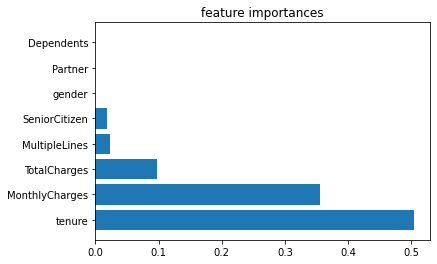

In [192]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'MonthlyCharges', 'TotalCharges']
    
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, max_features=8 , random_state=42)

dt.fit(X_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=8)

In [154]:
from sklearn import tree

[Text(279.0, 362.4, 'X[4] <= 0.162\ngini = 0.387\nsamples = 4930\nvalue = [3635, 1295]'),
 Text(139.5, 217.44, 'X[4] <= 0.063\ngini = 0.498\nsamples = 1439\nvalue = [760, 679]'),
 Text(69.75, 72.47999999999996, 'gini = 0.496\nsamples = 847\nvalue = [385, 462]'),
 Text(209.25, 72.47999999999996, 'gini = 0.464\nsamples = 592\nvalue = [375, 217]'),
 Text(418.5, 217.44, 'X[4] <= 0.782\ngini = 0.291\nsamples = 3491\nvalue = [2875, 616]'),
 Text(348.75, 72.47999999999996, 'gini = 0.353\nsamples = 2320\nvalue = [1788, 532]'),
 Text(488.25, 72.47999999999996, 'gini = 0.133\nsamples = 1171\nvalue = [1087, 84]')]

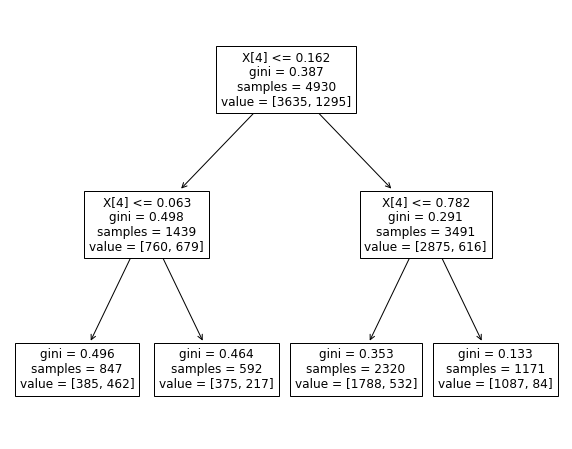

In [155]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(dt)

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
rf = RandomForestClassifier(max_depth=6, max_features=6, random_state=42)

In [166]:
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=6, max_features=6, random_state=42)

In [167]:
rf.score(X_train,y_train)

0.8117647058823529

In [168]:
rf.score(X_test,y_test)

0.7903454803596782

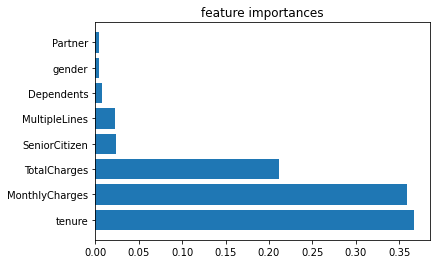

In [169]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'MonthlyCharges', 'TotalCharges']
    


# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=8)

In [ ]:
#pip install xgboost

In [171]:
from xgboost import XGBClassifier

In [188]:
xgb = XGBClassifier(max_depth=5, max_features=6, random_state=42,learning_rate=0.4)

In [189]:
xgb.fit(X_train,y_train)


C:\Users\Sniper\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=5, max_features=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
xgb.score(X_train,y_train)


0.9044624746450304

In [191]:
xgb.score(X_test,y_test)

0.7823000473260767